In [1]:
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ydata_profiling import ProfileReport

In [3]:
root_path = Path(os.getcwd()).resolve().parent
sys.path.append(str(root_path))

In [4]:
root_path

WindowsPath('C:/Users/Felipe/Desktop/THE-BRIDGE/THEBRIDGE-BOOTCAMP-GITHUB/DS102024/0.2-Mis_ejer/laptops_dataset')

In [5]:
from scripts.auto_importer_laptops import DataFrameDescriber, CompleteDescribeTable

In [6]:
data = pd.read_parquet('../data/raw/train.parquet').set_index('laptop_ID')

In [7]:
df = data.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 599 to 87
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    object 
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_euros       912 non-null    float64
dtypes: float64(1), object(11)
memory usage: 92.6+ KB


In [9]:
complete_describe = DataFrameDescriber(df)

In [10]:
complete_describe.describe_categorico()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,912,912,912,912,912,912,912,912,912,912,912
unique,19,484,6,18,38,104,9,34,94,9,160
top,Dell,XPS 13,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,214,21,498,461,357,137,436,282,198,760,84


In [11]:
complete_describe.describe_numerico()

,Price_euros
count,912.000000
mean,1111.262533
std,682.109694
min,174.000000
25%,598.742500
50%,977.000000
75%,1472.650000
max,5499.000000


In [12]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [13]:
# report = ProfileReport(df)

In [14]:
# report

In [15]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.0
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.0
744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia Quadro M2200,Windows 10,2.6kg,2419.0
729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,836.6
957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1119.0


Inicio limpieza de datos

In [16]:
#Eliminando la unidad de medida y dejando solo el valor numérico para transformar la columna de tipo objeto a numero flotante

df['Weight'] = df['Weight'].str.replace('kg','').astype(float)

In [17]:
#Eliminando la unidad de medida y dejando solo el valor numérico para transformar la columna de tipo objeto a numero intero

df['Ram'] = df['Ram'].str.replace('GB','').astype(int)

In [18]:
# Transformación columna inches de tipo objeto a numero flotante

df['Inches'] = df['Inches'].astype(float)

In [19]:
# list_a = []
# list_b = []
# for cpu in df['Cpu']:
#     list_a.append(cpu.split()[1:-1])

# for output_model_cpu in list_a:
#     list_b.append(' '.join(output_model_cpu))

In [20]:
# Creando lista con el nombre de la fabricante de la CPU

cpu_brand_list = []
for cpu in df['Cpu']:
    cpu_brand_list.append(cpu.split()[0])

list_a = []
cpu_model_list = []
for cpu in df['Cpu']:
    list_a.append(cpu.split()[1:-1])

for output_model_cpu in list_a:
    cpu_model_list.append(' '.join(output_model_cpu))

cpu_freq_list = []
for cpu in df['Cpu']:
    cpu_freq_list.append(cpu.split()[-1].replace('GHz',''))

In [21]:
# Creando columna en el DF para recibir los valores que provienen de la lista anterior

df.insert(7,'CPU_Brand', cpu_brand_list)
df.insert(8,'CPU_Model', cpu_model_list)
df.insert(9,'CPU_Freq', cpu_freq_list)

In [22]:
#Eliminando la unidad de medida y dejando solo el valor numérico para transformar la columna de tipo objeto a numero intero

df['CPU_Freq'] = df['CPU_Freq'].astype(float)

In [23]:
# Drop columna CPU que dio origen a tres nuevas columnas que describen más específicamente cada procesador

df = df.drop(columns='Cpu')

In [24]:
# Creación de las columnas que recibirán los valores de resolución de pantalla

df[['Resolution_X', 'Resolution_Y']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(int)

In [25]:
# Posicionamento de las columnas en sus lugares debidos

df.insert(5, 'Resolution_X', df.pop('Resolution_X'))
df.insert(6, 'Resolution_Y', df.pop('Resolution_Y'))

In [26]:
# Creación de la columna Is_touch que asigna valor 1 para laptop con pantalla touchscreen y 0 para pantallas no touchscreen

df['Is_touch'] = df['ScreenResolution'].str.contains('Touch', case=False).astype(int)

In [27]:
# Posicionamento de la columna en su lugar debido

df.insert(7, 'Is_touch', df.pop('Is_touch'))

In [28]:
# # Eliminación de la columna inicial de resolución de pantalla que fue reemplazada por las columnas recién creadas

df = df.drop(columns='ScreenResolution')

In [29]:
# Cambio del valor en la columna TypeName para laptops 2 en 1

df.loc[df['TypeName'].str.contains('Convertible', case=False, na=False), 'TypeName'] = 'Convertible'

In [30]:
# Arreglando los valores de los discos duros híbridos
df['Memory'] = df['Memory'].str.replace('1.0TB','1TB')

# Creación de las columnas de discos duros
df['SSD'] = df['Memory'].str.extract(r'(\d+)GB SSD').fillna(0).astype(int)
df['HDD'] = df['Memory'].str.extract(r'(\d+)TB HDD').fillna(0).astype(int) * 1024
df['Hybrid'] = df['Memory'].str.extract(r'(\d+)TB Hybrid').fillna(0).astype(int) * 1024
df['Flash_storage'] = df['Memory'].str.extract(r'(\d+)GB Flash Storage').fillna(0).astype(int)

# Posicionamento de las columnas en sus lugares debidos
df.insert(11, 'SSD', df.pop('SSD'))
df.insert(12, 'HDD', df.pop('HDD'))
df.insert(13, 'Hybrid', df.pop('Hybrid'))
df.insert(14, 'Flash_storage', df.pop('Flash_storage'))

# Eliminación de la columna inicial de los datos de disco duro que fue reemplazada por las nuevas columnas recién creadas
df = df.drop(columns='Memory')

In [31]:
# Creación de la lista con los nombres de la marca del GPU

gpu_brand = []
for gpu in df['Gpu']:
    gpu_brand.append(gpu.split()[0])

# Creación de la lista con los nombres de modelos del GPU
gpu_model = []
gpu_model_list = []
for gpu in df['Gpu']:
    gpu_model.append(gpu.split()[1:])

for output_model_gpu in gpu_model:
    gpu_model_list.append(' '.join(output_model_gpu))

In [32]:
# Creación de las nuevas columnas posicionándolas en sus lugares debidos

df.insert(16,'GPU_Brand', gpu_brand)
df.insert(17,'GPU_Model', gpu_model_list)

In [33]:
# Creación y posicionamento de la columna que informa se el GPU es dedicado o integrado

df['Is_GPU_dedicated'] = np.where(df['GPU_Brand'].str.contains('Intel', case=False),0,1).astype(int)

df.insert(18, 'Is_GPU_dedicated', df.pop('Is_GPU_dedicated'))

In [34]:
# Eliminación de la columna inicial GPU que fue reemplazada por las nuevas columnas recién creadas

df = df.drop(columns='Gpu')

In [35]:
# Arreglando valores de la columna OpSys excluyendo las versiones y dejando solo el nombre de la empresa fabricante del OS en uso

def categorize_os(os):
    if 'Windows' in os:
        return 'Windows'
    elif 'macOS' in os:
        return 'macOS'
    elif 'Mac OS' in os:
        return 'macOS'
    elif 'Linux' in os:
        return 'Linux'
    else:
        return 'Chrome OS'

df['OpSys'] = df['OpSys'].apply(categorize_os)

In [36]:
# pd.set_option('display.max_rows',None)
# df

In [37]:
df.head().drop(columns='Price_euros')

,Company,Product,TypeName,Inches,Resolution_X,Resolution_Y,Is_touch,Ram,CPU_Brand,CPU_Model,CPU_Freq,SSD,HDD,Hybrid,Flash_storage,GPU_Brand,GPU_Model,Is_GPU_dedicated,OpSys,Weight
laptop_ID,,,,,,,,,,,,,,,,,,,,
599,Dell,Inspiron 3179,Convertible,11.6,1366,768,1,4,Intel,Core M 7Y30,1.0,128,0,0,0,Intel,HD Graphics 615,0,Windows,1.39
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,1920,1080,0,8,AMD,FX 9830P,3.0,0,1024,0,0,AMD,Radeon RX 560,1,Windows,2.45
744,HP,ZBook 15,Workstation,15.6,1920,1080,0,16,Intel,Core i7 7700HQ,2.8,256,0,0,0,Nvidia,Quadro M2200,1,Windows,2.60
729,HP,Pavilion X360,Convertible,13.3,1366,768,1,8,Intel,Core i5 7200U,2.5,256,0,0,0,Intel,HD Graphics 620,0,Windows,1.58
957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366,768,0,8,Intel,Core i5 6200U,2.3,256,0,0,0,Intel,HD Graphics 520,0,Windows,2.20


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 599 to 87
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   Resolution_X      912 non-null    int64  
 5   Resolution_Y      912 non-null    int64  
 6   Is_touch          912 non-null    int64  
 7   Ram               912 non-null    int64  
 8   CPU_Brand         912 non-null    object 
 9   CPU_Model         912 non-null    object 
 10  CPU_Freq          912 non-null    float64
 11  SSD               912 non-null    int64  
 12  HDD               912 non-null    int64  
 13  Hybrid            912 non-null    int64  
 14  Flash_storage     912 non-null    int64  
 15  GPU_Brand         912 non-null    object 
 16  GPU_Model         912 non-null    object 
 17  I

In [39]:
df.describe()

,Inches,Resolution_X,Resolution_Y,Is_touch,Ram,CPU_Freq,SSD,HDD,Hybrid,Flash_storage,Is_GPU_dedicated,Weight,Price_euros
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,15.007785,1877.131579,1060.982456,0.152412,8.377193,2.300154,165.912281,376.140351,10.105263,4.771930,0.447368,2.045422,1111.262533
std,1.454677,470.439177,271.138397,0.359617,5.144482,0.514809,160.797877,534.219282,101.276452,32.231336,0.497495,0.673665,682.109694
min,10.100000,1366.000000,768.000000,0.000000,2.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.690000,174.000000
25%,14.000000,1600.000000,900.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,598.742500
50%,15.600000,1920.000000,1080.000000,0.000000,8.000000,2.500000,128.000000,0.000000,0.000000,0.000000,0.000000,2.050000,977.000000
75%,15.600000,1920.000000,1080.000000,0.000000,8.000000,2.700000,256.000000,1024.000000,0.000000,0.000000,1.000000,2.330000,1472.650000
max,18.400000,3840.000000,2160.000000,1.000000,64.000000,3.600000,512.000000,2048.000000,1024.000000,512.000000,1.000000,4.700000,5499.000000


In [40]:
tabla_resumen = CompleteDescribeTable(df)

In [41]:
tabla_resumen.describe_complete()

In [42]:
resumen_df = tabla_resumen.get_describe_complete()

In [43]:
resumen_df

,tipo de dato,tipo de variable,cardinalidad abs,cardinalidad %,distribucion,% missing,% Outliers,rango,moda,mediana,media,desv estandar,Q1,Q3,asimetria,curtosis,Valor estad.,Valor de P,prueba normalidad,tipo asimetria
variable,,,,,,,,,,,,,,,,,,,,
Company,object,categorica,19,2.083333,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
Product,object,categorica,484,53.070175,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
TypeName,object,categorica,6,0.657895,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
Inches,float64,numerica,18,1.973684,No Gaussiana,0.0,3.29,"(10.1, 18.4)",15.6,15.60,15.007785,1.454677,14.0000,15.60,-0.449882,-0.114037,0.880078,6.230082e-26,No normal,negativa
Resolution_X,int64,numerica,13,1.425439,No Gaussiana,0.0,7.02,"(1366, 3840)",1920.0,1920.00,1877.131579,470.439177,1600.0000,1920.00,2.214823,7.089993,0.642438,7.401426e-40,No normal,negativa
Resolution_Y,int64,numerica,10,1.096491,No Gaussiana,0.0,8.55,"(768, 2160)",1080.0,1080.00,1060.982456,271.138397,900.0000,1080.00,2.119331,6.263822,0.654359,2.231759e-39,No normal,negativa
Is_touch,int64,numerica,2,0.219298,No Gaussiana,0.0,15.24,"(0, 1)",0.0,0.00,0.152412,0.359617,0.0000,0.00,1.937347,1.757160,0.429734,9.187518e-47,No normal,negativa
Ram,int64,numerica,9,0.986842,No Gaussiana,0.0,16.67,"(2, 64)",8.0,8.00,8.377193,5.144482,4.0000,8.00,2.989951,19.009122,0.697995,1.684747e-37,No normal,negativa
CPU_Brand,object,categorica,3,0.328947,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None


In [44]:
categoric_cols = df.select_dtypes(include='object').columns

In [45]:
categoric_cols

Index(['Company', 'Product', 'TypeName', 'CPU_Brand', 'CPU_Model', 'GPU_Brand',
       'GPU_Model', 'OpSys'],
      dtype='object')

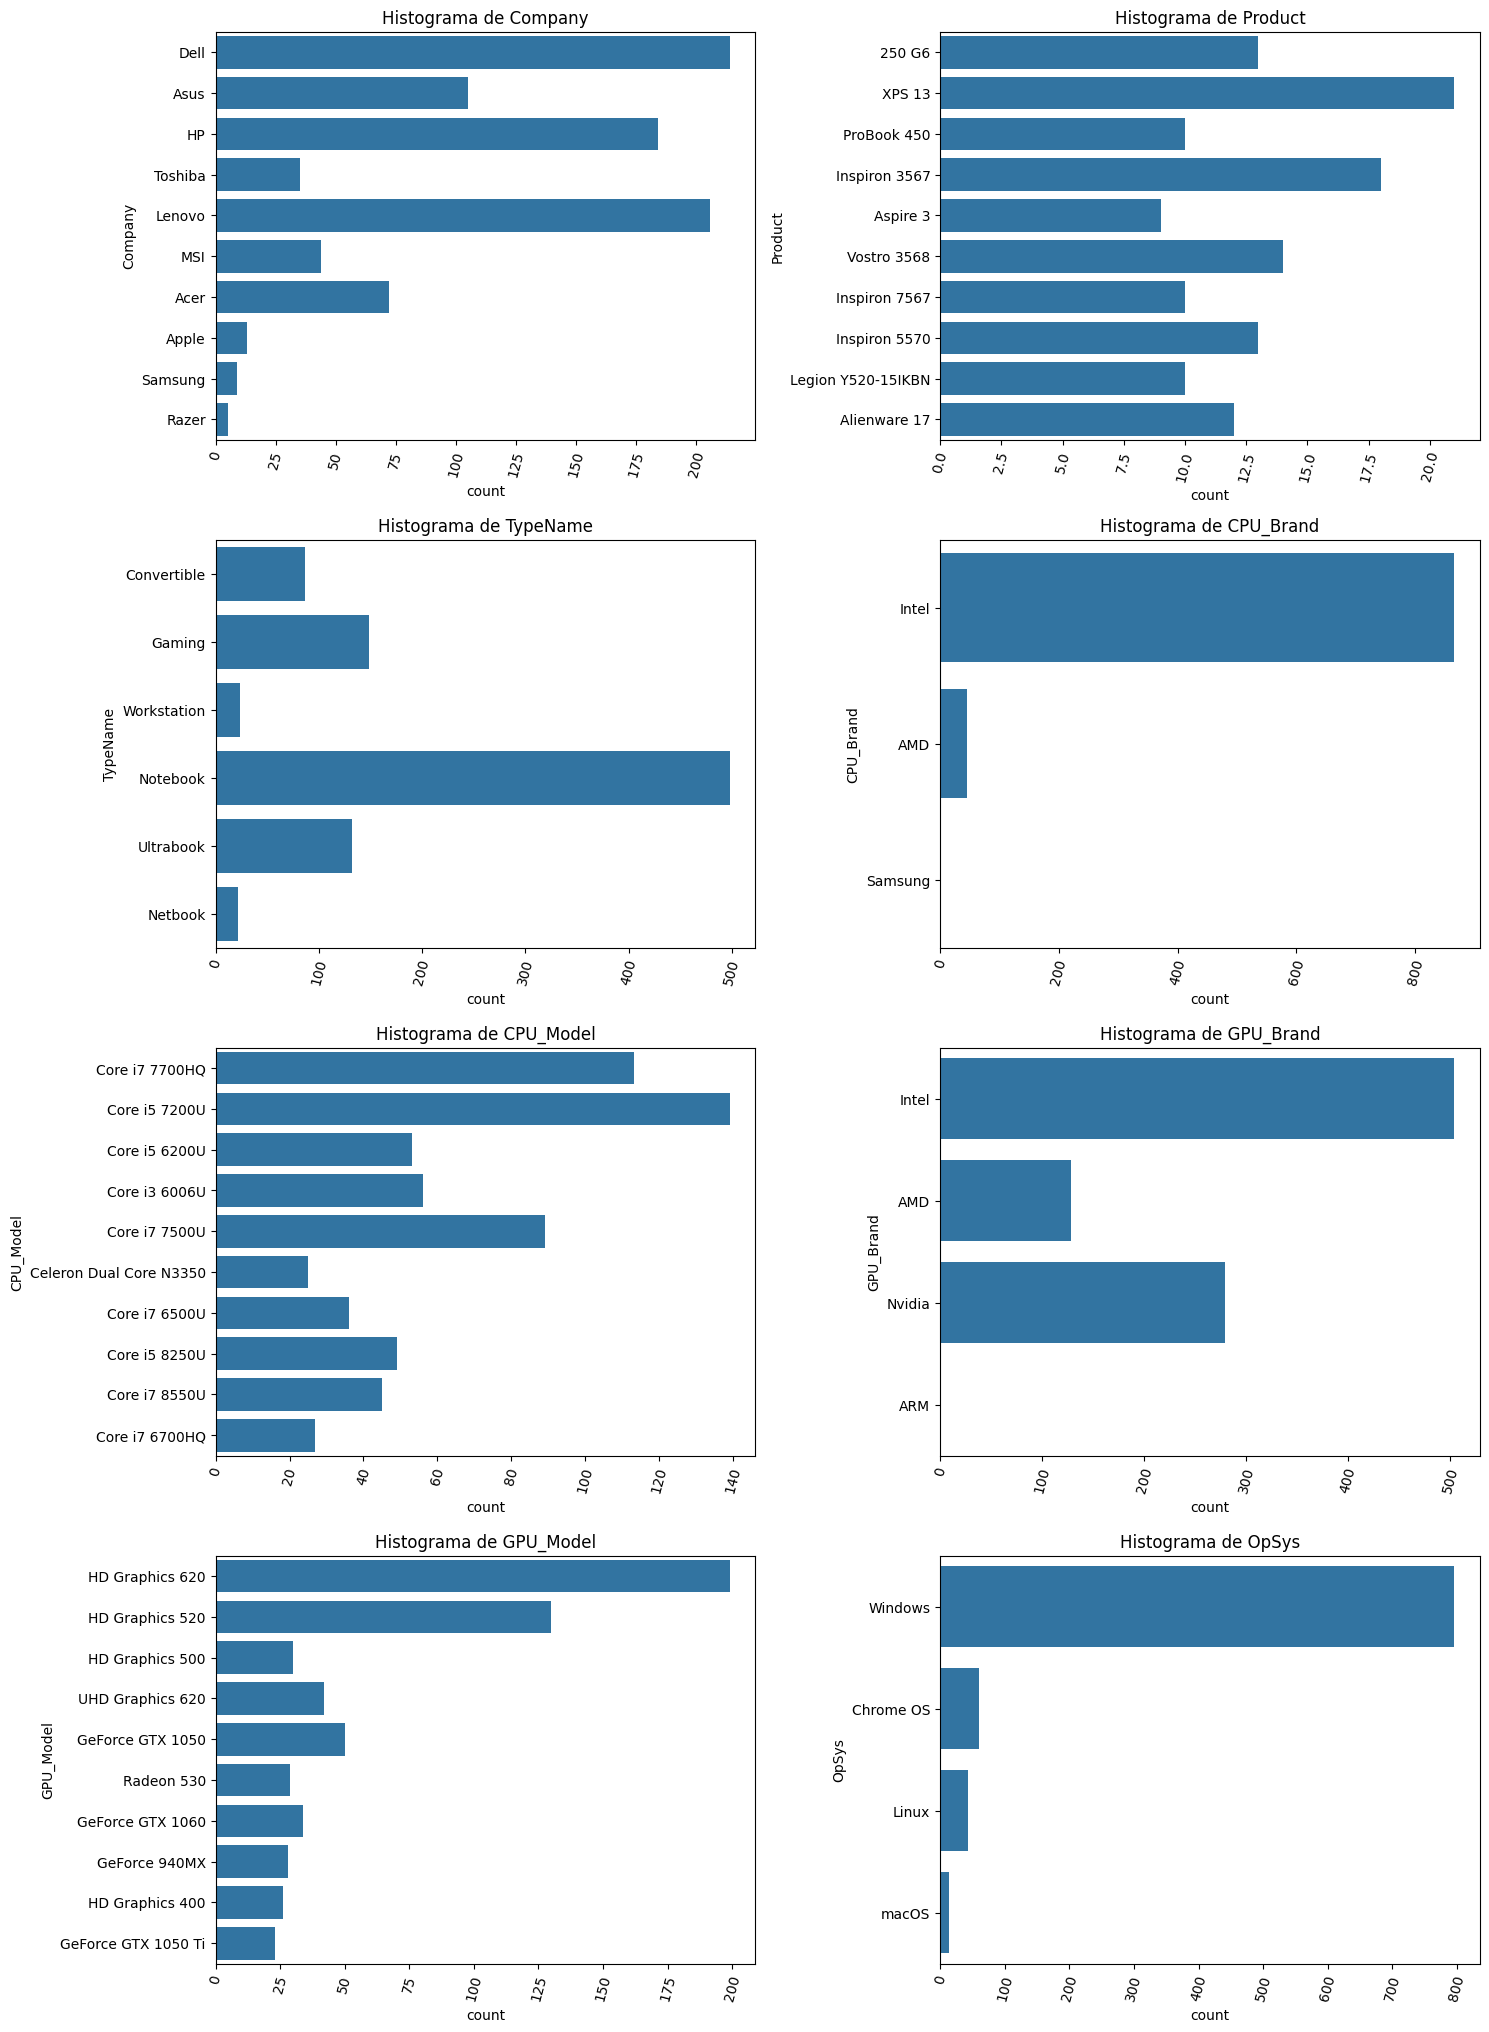

In [46]:
plt.figure(figsize=(15,30))
for i, col in enumerate(categoric_cols):
    top_10 = df[col].value_counts().head(10)
    df_filtrado_top_10 = df[df[col].isin(top_10.index)]
    plt.subplot(6,2, i+1)
    sns.countplot(data=df_filtrado_top_10[col])
    plt.title(f'Histograma de {col}')
    plt.xticks(rotation=75)
    plt.tight_layout()

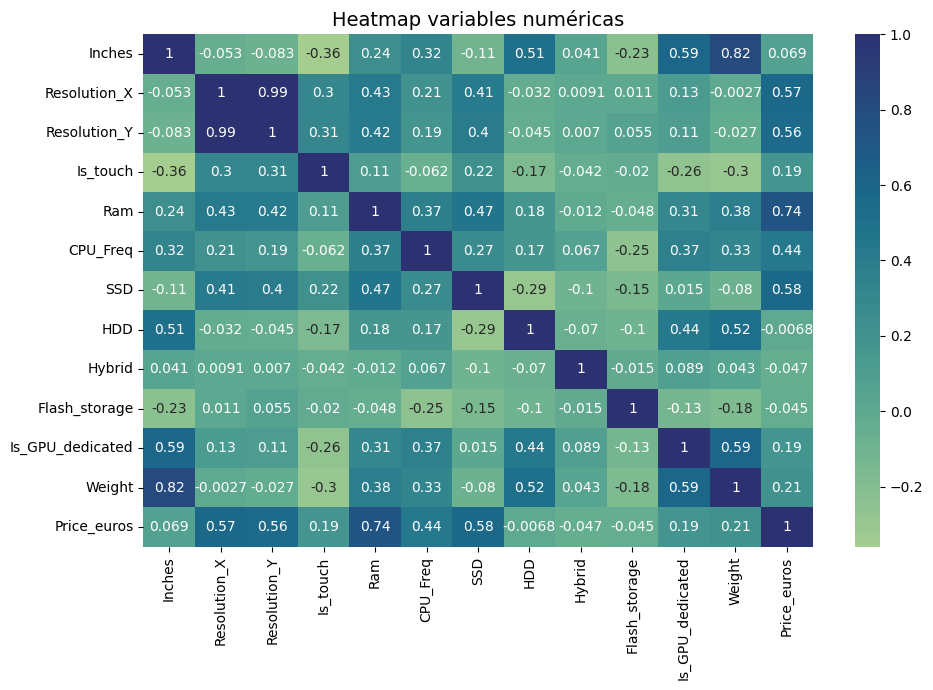

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='crest');
plt.title("Heatmap variables numéricas", fontsize=14);
plt.tight_layout()
plt.show()